In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from modules.lv_utils import load_households
from modules.lv_utils import load_voters

In [16]:
# load the data
households = load_households('data_clean/20180724_fullset_households_district3.csv')
voters = load_voters('data_clean/20180724_fullset_voters_district3.csv')
elections = pd.read_csv('data_clean/20180621_election_data.csv')

In [17]:
v = voters
h = households
e = elections
print(v.columns)
print(h.columns)
e.columns

Index(['Vid', 'Abbr', 'Precinct', 'PrecinctSub', 'Party', 'PartyMain',
       'RegDate', 'PAV', 'RegDateOriginal', 'E6_110816', 'E5_060716',
       'E4_110414', 'E3_060314', 'E2_110612', 'E1_060512', 'District',
       'VScore', 'VScorePos', 'VScorePct', 'BirthYear',
       'OldestInHouseBirthYear', 'IsOldestInHouse', 'havePhone',
       'BirthPlaceState', 'BirthPlaceStateRegion', 'BirthPlaceCountry',
       'BirthPlaceCountryRegion', 'Gender', 'sameMailAddress', 'MailCountry',
       'isApt', 'Zip', 'StreetType', 'EmailProvider', 'E5_060716BT',
       'E1_060512BT', 'Hid', 'cHid', 'E34_nVotesPos', 'E34_nVotes',
       'E34_nVotesPct', 'E56_nVotesPos', 'E56_nVotes', 'E56_nVotesPct',
       'E78_nVotesPos', 'E78_nVotes', 'E78_nVotesPct', 'Eap_nVotesPos',
       'Eap_nVotes', 'Eap_nVotesPct', 'Eag_nVotesPos', 'Eag_nVotes',
       'Eag_nVotesPct', 'E2_GndTth', 'E4_GndTth', 'E6_GndTth', 'nVotersInHH',
       'PAVCode', 'nPAVInHH', 'HasParty', 'nAffInHH', 'isDEM', 'isREP',
       'isNPP', '

Index(['elections', 'dates', 'cycle', 'etype', 'president', 'us_senate_maj',
       'us_repre_maj', 'ca_governor', 'ca_lt_govnor', 'ca_senate_maj',
       'ca_assembly_maj'],
      dtype='object')

### Initial look at voter rate distribution

In [4]:
df34 = v.loc[v.E34_nVotesPct>=0,['E34_nVotesPct','Vid']].set_index('Vid')
df56 = v.loc[v.E56_nVotesPct>=0,['E56_nVotesPct','Vid']].set_index('Vid')
df78 = v.loc[v.E78_nVotesPct>=0,['E78_nVotesPct','Vid']].set_index('Vid')

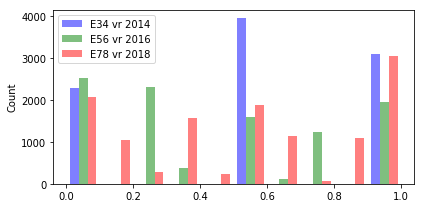

In [5]:
plt.rcParams["figure.figsize"] = (6,3)

fig, ax1 = plt.subplots()
ax1.hist([df34.values, df56.values, df78.values], color=['b','g','r'], 
         alpha=0.5, bins=10,
         label=['E34 vr 2014','E56 vr 2016','E78 vr 2018'])

ax1.set_ylabel("Count")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [6]:
print('number of voters in E34 data {}'.format(len(df34)))
print('number of voters in E56 data {}'.format(len(df56)))
print('number of voters in E78 data {}'.format(len(df78)))

number of voters in E34 data 9303
number of voters in E56 data 10043
number of voters in E78 data 12378


#### and compare the E78 data with my friends weighted vote rate score

In [7]:
dfvs = v.loc[v.VScorePct >= 0, ['VScorePct','Vid']].set_index('Vid')

In [8]:
x = dfvs.values
y = df78.values
#print(df78.E78_nVotesPct.value_counts())
#print(dfvs.VScorePct.value_counts())

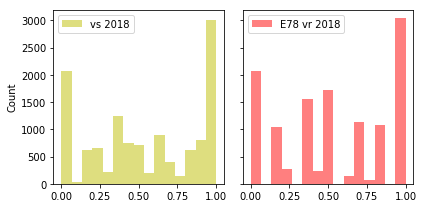

In [9]:
bins=15
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.hist(x, color='y', alpha=0.5, label='vs 2018', bins=bins)
ax1.legend(loc='upper left')
ax1.set_ylabel("Count")

ax2.hist(y, color='r', alpha=0.5, label='E78 vr 2018', bins=bins)
ax2.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Initial look at vote rate against age (aka BirthYear)

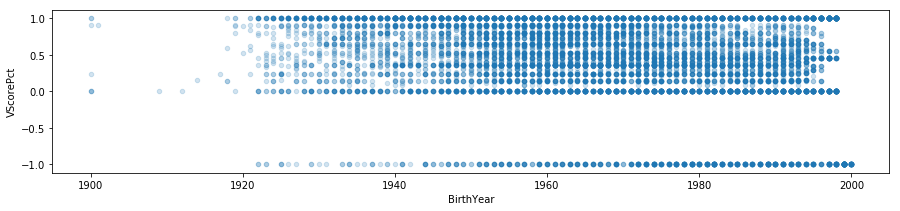

In [10]:
plt.rcParams["figure.figsize"] = (15,3)
df = v[['VScorePct','BirthYear']].sort_values('VScorePct')
df.plot(kind='scatter', x='BirthYear', y='VScorePct', alpha = 0.2)
plt.show()

Grouping into the 3 behavior groups you can see above, people who always vote, sometimes vote and never vote. Comparing distributions against age.

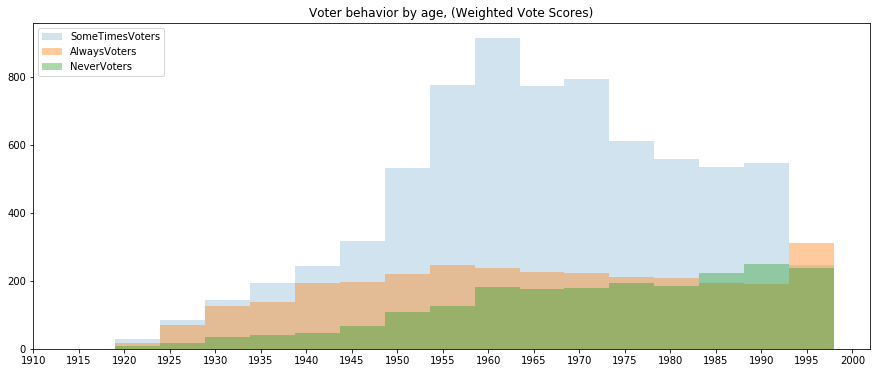

In [11]:
realVoters = v.loc[(v.BirthYear > 1918) & (v.BirthYear < 2010)]

plt.rcParams["figure.figsize"] = (15,6)
fig, ax1 = plt.subplots()
ax1.hist(realVoters.loc[(v.VScorePct < 1) & (v.VScorePct > 0),'BirthYear'], bins=16, alpha=0.2,
         label='SomeTimesVoters')
ax1.hist(realVoters.loc[(v.VScorePct == 1),'BirthYear'], bins=16, alpha=0.4,
         label='AlwaysVoters')
ax1.hist(realVoters.loc[(v.VScorePct == 0),'BirthYear'], bins=16, alpha=0.4,
         label='NeverVoters')

ax1.legend(loc='upper left')
ax1.set_title('Voter behavior by age, (Weighted Vote Scores)')
plt.xticks(np.arange(1910, 2005, step=5))
plt.show()

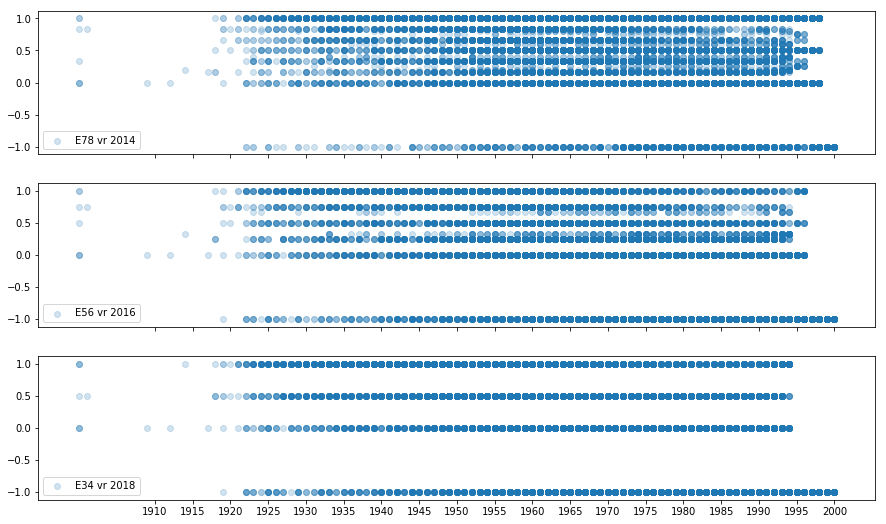

In [12]:
plt.rcParams["figure.figsize"] = (15,9)
df = v[['E34_nVotesPct','E56_nVotesPct','E78_nVotesPct','BirthYear']].sort_values('BirthYear')

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True)
ax1.scatter(x=df.BirthYear, y=df.E78_nVotesPct, alpha = 0.2, label='E78 vr 2014')
ax1.legend(loc='lower left')
ax2.scatter(x=df.BirthYear, y=df.E56_nVotesPct, alpha = 0.2, label='E56 vr 2016')
ax2.legend(loc='lower left')
ax3.scatter(x=df.BirthYear, y=df.E34_nVotesPct, alpha = 0.2, label='E34 vr 2018')
ax3.legend(loc='lower left')
plt.xticks(np.arange(1910, 2005, step=5))
plt.show()

In [13]:
realVoters.columns

Index(['Vid', 'Abbr', 'Precinct', 'PrecinctSub', 'Party', 'PartyMain',
       'RegDate', 'PAV', 'RegDateOriginal', 'E6_110816', 'E5_060716',
       'E4_110414', 'E3_060314', 'E2_110612', 'E1_060512', 'District',
       'VScore', 'VScorePos', 'VScorePct', 'BirthYear',
       'OldestInHouseBirthYear', 'IsOldestInHouse', 'havePhone',
       'BirthPlaceState', 'BirthPlaceStateRegion', 'BirthPlaceCountry',
       'BirthPlaceCountryRegion', 'Gender', 'sameMailAddress', 'MailCountry',
       'isApt', 'Zip', 'StreetType', 'EmailProvider', 'E5_060716BT',
       'E1_060512BT', 'Hid', 'cHid', 'E34_nVotesPos', 'E34_nVotes',
       'E34_nVotesPct', 'E56_nVotesPos', 'E56_nVotes', 'E56_nVotesPct',
       'E78_nVotesPos', 'E78_nVotes', 'E78_nVotesPct', 'nVotersInHH',
       'PAVCode', 'nPAVInHH', 'HasParty', 'nAffInHH', 'isDEM', 'isREP',
       'isNPP', 'nDEMInHH', 'nREPInHH', 'nNPPInHH', 'E34_nVotesPosInHH',
       'E34_nVotesInHH', 'E34_nVotesPctInHH', 'E56_nVotesPosInHH',
       'E56_nVotesInHH', '

In [14]:
E34v = pd.DataFrame(realVoters[['E34_nVotesPct','BirthYear']]).rename(
    columns = {'E34_nVotesPct':'VoteRate'})
E56v = pd.DataFrame(realVoters[['E56_nVotesPct','BirthYear']]).rename(
    columns = {'E56_nVotesPct':'VoteRate'})
E78v = pd.DataFrame(realVoters[['E78_nVotesPct','BirthYear']]).rename(
    columns = {'E78_nVotesPct':'VoteRate'})

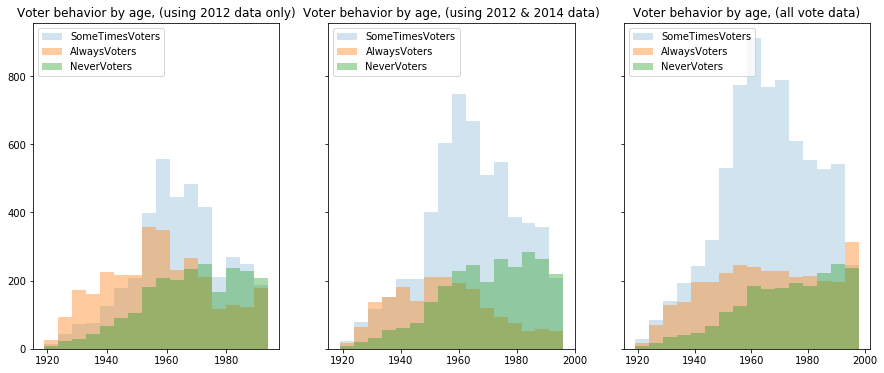

In [15]:

plt.rcParams["figure.figsize"] = (15,6)
fig, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True)
n, b, p = ax1.hist(E34v.loc[(E34v.VoteRate < 1) & (E34v.VoteRate > 0),'BirthYear'], bins=16, alpha=0.2,
        label='SomeTimesVoters')
n, b, p = ax1.hist(E34v.loc[(E34v.VoteRate == 1),'BirthYear'], bins=16, alpha=0.4,
         label='AlwaysVoters')
n, b, p = ax1.hist(E34v.loc[(E34v.VoteRate == 0),'BirthYear'], bins=16, alpha=0.4,
         label='NeverVoters')
ax1.legend(loc='upper left')
ax1.set_title('Voter behavior by age, (using 2012 data only)')

n, b, p = ax2.hist(E56v.loc[(E56v.VoteRate < 1) & (E56v.VoteRate > 0),'BirthYear'], bins=16, alpha=0.2,
        label='SomeTimesVoters')
n, b, p = ax2.hist(E56v.loc[(E56v.VoteRate == 1),'BirthYear'], bins=16, alpha=0.4,
         label='AlwaysVoters')
n, b, p = ax2.hist(E56v.loc[(E56v.VoteRate == 0),'BirthYear'], bins=16, alpha=0.4,
         label='NeverVoters')
ax2.legend(loc='upper left')
ax2.set_title('Voter behavior by age, (using 2012 & 2014 data)')

n, b, p = ax3.hist(E78v.loc[(E78v.VoteRate < 1) & (E78v.VoteRate > 0),'BirthYear'], bins=16, alpha=0.2,
        label='SomeTimesVoters')
n, b, p = ax3.hist(E78v.loc[(E78v.VoteRate == 1),'BirthYear'], bins=16, alpha=0.4,
         label='AlwaysVoters')
n, b, p = ax3.hist(E78v.loc[(E78v.VoteRate == 0),'BirthYear'], bins=16, alpha=0.4,
         label='NeverVoters')
ax3.legend(loc='upper left')
ax3.set_title('Voter behavior by age, (all vote data)')

plt.show()

The always vote group skews older, the never vote group skews younger, the different distributions are most marked in the congressional 'off election' year 2014

## Looking for other patterns, focusing on the 3 sets of vote rate data only

In [16]:
v.columns

Index(['Vid', 'Abbr', 'Precinct', 'PrecinctSub', 'Party', 'PartyMain',
       'RegDate', 'PAV', 'RegDateOriginal', 'E6_110816', 'E5_060716',
       'E4_110414', 'E3_060314', 'E2_110612', 'E1_060512', 'District',
       'VScore', 'VScorePos', 'VScorePct', 'BirthYear',
       'OldestInHouseBirthYear', 'IsOldestInHouse', 'havePhone',
       'BirthPlaceState', 'BirthPlaceStateRegion', 'BirthPlaceCountry',
       'BirthPlaceCountryRegion', 'Gender', 'sameMailAddress', 'MailCountry',
       'isApt', 'Zip', 'StreetType', 'EmailProvider', 'E5_060716BT',
       'E1_060512BT', 'Hid', 'cHid', 'E34_nVotesPos', 'E34_nVotes',
       'E34_nVotesPct', 'E56_nVotesPos', 'E56_nVotes', 'E56_nVotesPct',
       'E78_nVotesPos', 'E78_nVotes', 'E78_nVotesPct', 'nVotersInHH',
       'PAVCode', 'nPAVInHH', 'HasParty', 'nAffInHH', 'isDEM', 'isREP',
       'isNPP', 'nDEMInHH', 'nREPInHH', 'nNPPInHH', 'E34_nVotesPosInHH',
       'E34_nVotesInHH', 'E34_nVotesPctInHH', 'E56_nVotesPosInHH',
       'E56_nVotesInHH', '

In [17]:
cols = ['Abbr','Precinct','RegDate','RegDateOriginal','PAV',
       'BirthYear','OldestInHouseBirthYear','IsOldestInHouse','havePhone','sameMailAddress',
       'MailCountry','isApt','Zip','HasParty',
        'isDEM','isREP','isNPP','CityArea']
cols_hh = ['nVotersInHH','nPAVInHH','nAffInHH','nDEMInHH','nREPInHH','nNPPInHH',
           'mostAfflsInHH','mixedAfflsInHH','allAffInHH','uniformAffInHH']
cols_hh_mo = ['E34_nVotesPctInHH','E56_nVotesPctInHH','E78_nVotesPctInHH']
cols_need_na = ['BirthPlaceState', 'BirthPlaceCountry','Gender','Party', 'PartyMain'
                ,'StreetType','EmailProvider']
cols_out = ['E34_nVotesPct', 'E56_nVotesPct', 'E78_nVotesPct']

In [18]:
vfc = v[cols + cols_hh + cols_hh_mo + cols_need_na + cols_out]
vfc = vfc.copy()
vfc.columns

Index(['Abbr', 'Precinct', 'RegDate', 'RegDateOriginal', 'PAV', 'BirthYear',
       'OldestInHouseBirthYear', 'IsOldestInHouse', 'havePhone',
       'sameMailAddress', 'MailCountry', 'isApt', 'Zip', 'HasParty', 'isDEM',
       'isREP', 'isNPP', 'CityArea', 'nVotersInHH', 'nPAVInHH', 'nAffInHH',
       'nDEMInHH', 'nREPInHH', 'nNPPInHH', 'mostAfflsInHH', 'mixedAfflsInHH',
       'allAffInHH', 'uniformAffInHH', 'E34_nVotesPctInHH',
       'E56_nVotesPctInHH', 'E78_nVotesPctInHH', 'BirthPlaceState',
       'BirthPlaceCountry', 'Gender', 'Party', 'PartyMain', 'StreetType',
       'EmailProvider', 'E34_nVotesPct', 'E56_nVotesPct', 'E78_nVotesPct'],
      dtype='object')

In [19]:
for c in [cols_need_na]:
        vfc.loc[:,c].replace('UNK', np.NaN, inplace=True)
for c in [cols_out + cols_hh_mo]:
    vfc.loc[:,c].replace(-1, np.NaN, inplace=True)

    #[vfc[c].replace(-1, np.NaN, inplace=True) for c in vfc[cols_hh_mo]]
#vfc.EmailProvider.replace('unk', np.NaN, inplace=True)

In [20]:
#vfc.EmailProvider.value_counts(dropna=False)

In [21]:
#[vfc[c].value_counts().head() for c in vfc[cols]]

In [22]:
#vfc.info()

In [23]:
vfc[cols_out + cols_hh_mo + cols_hh].corr()

,E34_nVotesPct,E56_nVotesPct,E78_nVotesPct,E34_nVotesPctInHH,E56_nVotesPctInHH,E78_nVotesPctInHH,nVotersInHH,nPAVInHH,nAffInHH,nDEMInHH,nREPInHH,nNPPInHH,mixedAfflsInHH,allAffInHH,uniformAffInHH
E34_nVotesPct,1.000000,0.866538,0.373211,0.729691,0.638262,0.301876,0.042128,0.063838,0.101871,0.042075,0.138447,-0.096450,0.055509,0.120612,-0.014624
E56_nVotesPct,0.866538,1.000000,0.451730,0.650647,0.744807,0.375197,0.040258,0.082747,0.097460,0.042987,0.126274,-0.092919,0.050685,0.115852,-0.013031
E78_nVotesPct,0.373211,0.451730,1.000000,0.329379,0.409725,0.775067,0.018748,0.116504,0.084171,0.071960,0.046317,-0.106840,0.005170,0.130556,0.022093
E34_nVotesPctInHH,0.729691,0.650647,0.329379,1.000000,0.864562,0.399944,0.208230,0.200441,0.240830,0.163967,0.170423,-0.036787,0.121593,0.071404,-0.160487
E56_nVotesPctInHH,0.638262,0.744807,0.409725,0.864562,1.000000,0.497720,0.184001,0.215133,0.216739,0.149023,0.155430,-0.040479,0.101974,0.076260,-0.137556
E78_nVotesPctInHH,0.301876,0.375197,0.775067,0.399944,0.497720,1.000000,0.053227,0.179406,0.119312,0.101739,0.058507,-0.106467,0.011239,0.132873,-0.016023
nVotersInHH,0.042128,0.040258,0.018748,0.208230,0.184001,0.053227,1.000000,0.698352,0.838194,0.733060,0.266372,0.359379,0.301742,-0.228634,-0.431356
nPAVInHH,0.063838,0.082747,0.116504,0.200441,0.215133,0.179406,0.698352,1.000000,0.598405,0.542334,0.177411,0.228002,0.187943,-0.133220,-0.277974
nAffInHH,0.101871,0.097460,0.084171,0.240830,0.216739,0.119312,0.838194,0.598405,1.000000,0.855793,0.346693,-0.206162,0.378784,0.231490,-0.264225
nDEMInHH,0.042075,0.042987,0.071960,0.163967,0.149023,0.101739,0.733060,0.542334,0.855793,1.000000,-0.139735,-0.149048,0.127430,0.184199,-0.125493


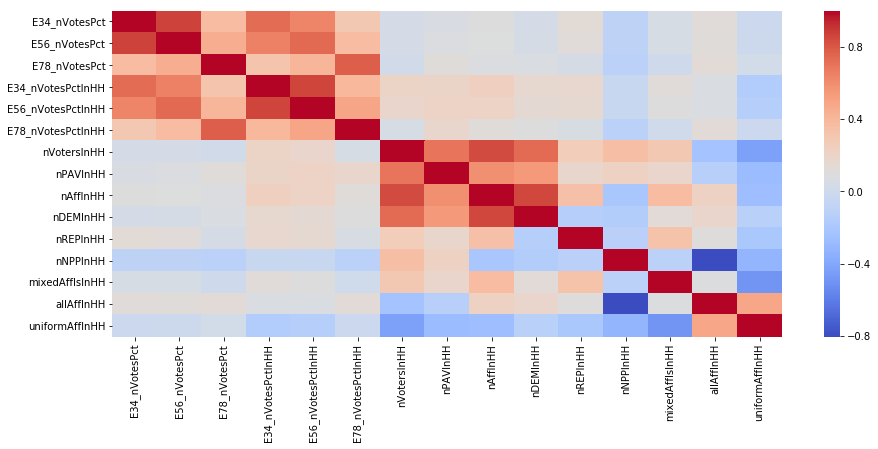

In [24]:
# calculate the correlation matrix
corr = vfc[cols_out + cols_hh_mo + cols_hh].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='coolwarm')
plt.show()

In [25]:
vfc[cols + cols_need_na + cols_out].corr()

,Abbr,Precinct,BirthYear,OldestInHouseBirthYear,IsOldestInHouse,havePhone,sameMailAddress,isApt,Zip,HasParty,isDEM,isREP,isNPP,E34_nVotesPct,E56_nVotesPct,E78_nVotesPct
Abbr,1.000000,0.030848,-0.000566,0.027531,0.037651,-0.028249,-0.035555,0.046193,0.095783,0.000406,0.026616,-0.033653,-0.000326,-0.172326,-0.199423,-0.055876
Precinct,0.030848,1.000000,-0.030181,0.043500,0.088935,-0.010321,-0.019754,0.227459,-0.418098,-0.001257,-0.003371,0.012132,0.000423,-0.036624,-0.033740,-0.023389
BirthYear,-0.000566,-0.030181,1.000000,0.660768,-0.365598,-0.036274,-0.019242,0.022714,0.024202,-0.130194,-0.035936,-0.149292,0.128147,-0.428782,-0.444363,-0.238130
OldestInHouseBirthYear,0.027531,0.043500,0.660768,1.000000,0.163700,-0.015668,-0.000947,0.165752,0.012582,-0.124105,-0.051586,-0.103749,0.122805,-0.341091,-0.358914,-0.192887
IsOldestInHouse,0.037651,0.088935,-0.365598,0.163700,1.000000,0.009351,-0.001746,0.198518,-0.000394,0.005453,-0.009127,0.031765,-0.004791,0.062412,0.059843,0.017034
havePhone,-0.028249,-0.010321,-0.036274,-0.015668,0.009351,1.000000,0.005897,0.002252,0.007284,0.066768,0.041580,0.023659,-0.063468,0.068349,0.061993,0.051646
sameMailAddress,-0.035555,-0.019754,-0.019242,-0.000947,-0.001746,0.005897,1.000000,-0.045917,-0.014047,0.000492,0.004053,0.006234,-0.001307,0.019935,0.025062,0.024626
isApt,0.046193,0.227459,0.022714,0.165752,0.198518,0.002252,-0.045917,1.000000,-0.004446,-0.007332,0.032615,-0.057694,0.005644,-0.158211,-0.152442,-0.087049
Zip,0.095783,-0.418098,0.024202,0.012582,-0.000394,0.007284,-0.014047,-0.004446,1.000000,-0.002743,0.025484,-0.048011,0.001752,-0.042710,-0.051564,-0.040919
HasParty,0.000406,-0.001257,-0.130194,-0.124105,0.005453,0.066768,0.000492,-0.007332,-0.002743,1.000000,0.677118,0.281568,-0.995306,0.150769,0.145958,0.142388


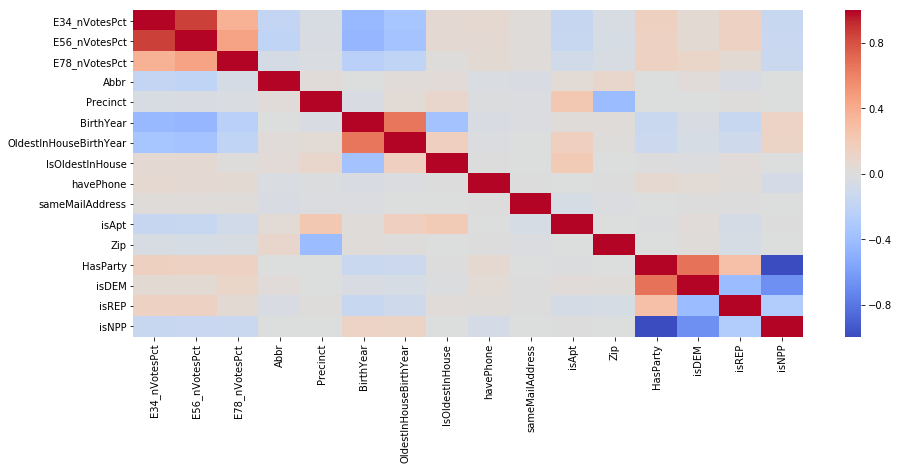

In [26]:
# calculate the correlation matrix
corr = vfc[cols_out + cols + cols_need_na].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='coolwarm')
plt.show()

## Exploring party association

In [27]:
cols_out = ['E34_nVotesPct', 'E56_nVotesPct', 'E78_nVotesPct']
cols_voter_party = ['HasParty','isDEM','isREP','isNPP']
cols_hh_party = ['nVotersInHH','nAffInHH','nDEMInHH','nREPInHH','nNPPInHH',
           'mostAfflsInHH','mixedAfflsInHH','allAffInHH','uniformAffInHH']

In [28]:
single_p_hh = v.loc[v.nVotersInHH == 1, cols_out + cols_voter_party]
multi_p_hh = v.loc[v.nVotersInHH > 1, cols_out + cols_voter_party]

[single_p_hh[c].replace(-1, np.NaN, inplace=True) for c in single_p_hh[cols_out]]
[multi_p_hh[c].replace(-1, np.NaN, inplace=True) for c in multi_p_hh[cols_out]]

[None, None, None]

In [29]:
single_p_hh.head()

,E34_nVotesPct,E56_nVotesPct,E78_nVotesPct,HasParty,isDEM,isREP,isNPP
4,NaN,NaN,NaN,1,1,0,0
28,0.5,0.50,0.666667,1,1,0,0
35,0.5,0.25,0.333333,0,0,0,1
36,NaN,NaN,1.000000,1,1,0,0
41,0.5,0.25,0.500000,0,0,0,1


In [30]:
v_party = v.loc[:, cols_out + ['HasParty']]
[v_party[c].replace(-1, np.NaN, inplace=True) for c in v_party[cols_out]]

[None, None, None]

In [31]:
v_party.head()

,E34_nVotesPct,E56_nVotesPct,E78_nVotesPct,HasParty
0,1.0,1.000000,1.000000,1
1,1.0,0.666667,0.800000,1
2,1.0,0.750000,0.833333,1
3,0.0,0.000000,0.000000,0
4,NaN,NaN,NaN,1


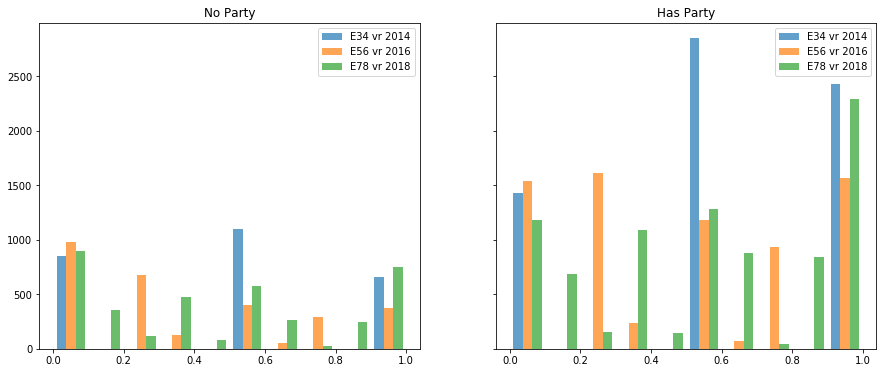

In [32]:
fig, axes = plt.subplots(1,2, sharey=True)

for key, grp in v_party.groupby(['HasParty']):
    axes[key].hist([grp.E34_nVotesPct.dropna(), grp.E56_nVotesPct.dropna(),
                    grp.E78_nVotesPct.dropna()], alpha=0.7, bins=10,
                    label=['E34 vr 2014','E56 vr 2016','E78 vr 2018'])
    axes[key].set_title('No Party' if key==0 else 'Has Party')
    axes[key].legend(loc='best')

plt.show()

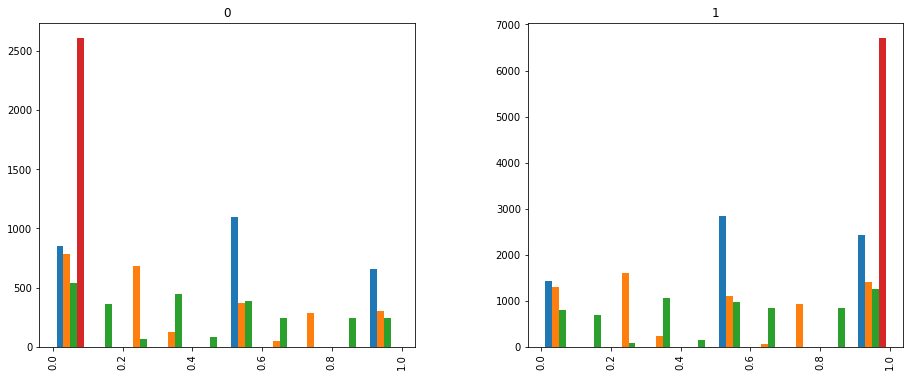

In [33]:
# a quicker way to the same thing!
v_party.hist(column=['E34_nVotesPct', 'E56_nVotesPct', 'E78_nVotesPct'], by='HasParty')
plt.show()

0


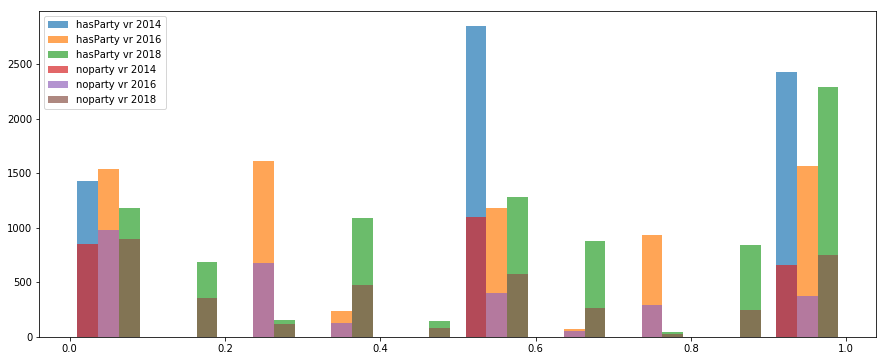

In [34]:
fig, ax = plt.subplots()
fp = []

g = v_party.groupby(['HasParty'])

for key, grp in sorted(g, reverse=True):
    pre = 'noparty' if key ==0 else 'hasParty'
    ax.hist([grp.E34_nVotesPct.dropna(), grp.E56_nVotesPct.dropna(),
             grp.E78_nVotesPct.dropna()], alpha=0.7, bins=10,
            label=[pre + ' vr 2014', pre + ' vr 2016', pre + ' vr 2018'])

print (len(fp))
#ax.hist([d for d in fp], alpha=0.7, bins=10,
#                    label=['noParty vr 2014','noParty vr 2016','noParty vr 2018',
#                           'hasParty vr 2014','hasParty vr 2016','hasParty vr 2018'])
    #axes[key].set_title('No Party' if key==0 else 'Has Party')
ax.legend(loc='best')

plt.show()

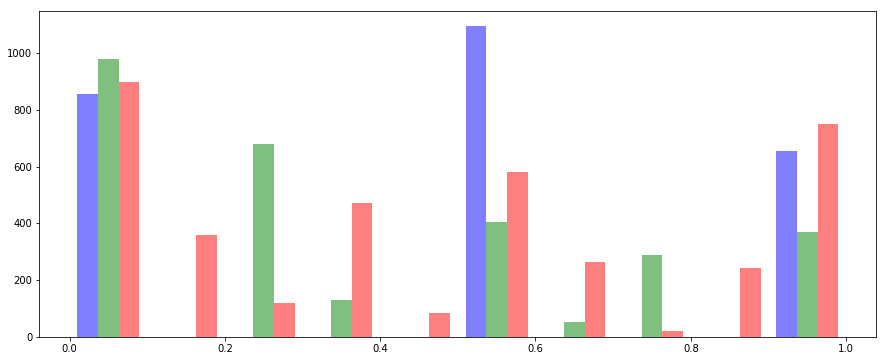

       E34_nVotesPct  E56_nVotesPct  E78_nVotesPct  HasParty
count    2605.000000    2903.000000    3794.000000    4200.0
mean        0.461612       0.356700       0.453040       0.0
std         0.378807       0.344113       0.363973       0.0
min         0.000000       0.000000       0.000000       0.0
25%         0.000000       0.000000       0.166667       0.0
50%         0.500000       0.250000       0.400000       0.0
75%         1.000000       0.500000       0.833333       0.0
max         1.000000       1.000000       1.000000       0.0
key: 1
   E34_nVotesPct  E56_nVotesPct  E78_nVotesPct  HasParty
0            1.0       1.000000       1.000000         1
1            1.0       0.666667       0.800000         1
2            1.0       0.750000       0.833333         1
4            NaN            NaN            NaN         1
5            NaN            NaN            NaN         1


In [35]:
for key, grp in v_party.groupby(['HasParty']):
    if key==0:
        #grp.E34_nVotesPct.plot(kind='hist')
        plt.hist([grp.E34_nVotesPct.dropna(), grp.E56_nVotesPct.dropna(),
                  grp.E78_nVotesPct.dropna()], color=['b','g','r'], 
         alpha=0.5, bins=10,
         label=['E34 vr 2014','E56 vr 2016','E78 vr 2018'])
        plt.show()
        print(grp.describe())
    if key==1:
        print('key: {}'.format(key))
        print(grp.head())

## exploring % rather than counts

In [36]:
voters = v.loc[:, cols_out + ['Vid']]
[voters[c].replace(-1, np.NaN, inplace=True) for c in voters[cols_out]]

[None, None, None]

In [37]:
df1 = voters[['E34_nVotesPct','Vid']].groupby(
    'E34_nVotesPct').agg('count')/voters.E34_nVotesPct.count()
df1 = df1.reset_index().rename(columns={'E34_nVotesPct':'VoteRate', 'Vid':'E34_Votes'})
df2 = voters[['E56_nVotesPct','Vid']].groupby(
    'E56_nVotesPct').agg('count')/voters.E56_nVotesPct.count()
df2 = df2.reset_index().rename(columns={'E56_nVotesPct':'VoteRate', 'Vid':'E56_Votes'})
df3 = voters[['E78_nVotesPct','Vid']].groupby(
    'E78_nVotesPct').agg('count')/voters.E78_nVotesPct.count()
df3 = df3.reset_index().rename(columns={'E78_nVotesPct':'VoteRate', 'Vid':'E78_Votes'})
dfm = pd.merge(pd.merge(df1,df2, on='VoteRate', how='outer'),df3, on='VoteRate', how='outer')
dfm = dfm.set_index('VoteRate').sort_index()

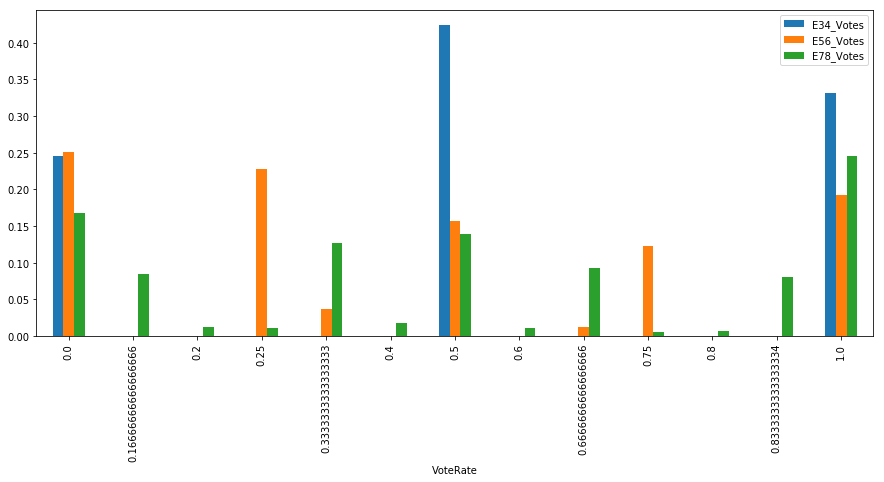

In [38]:
dfm.plot(kind='bar')
plt.show()

## exploring % of 'hasParty' rather than counts

In [39]:
# getting the voters, their voterates for each election cycle and if they have a party
voters = v.loc[:, cols_out + ['Vid', 'HasParty']]
# setting voterates to NaN if we don't have data for that observation
[voters[c].replace(-1, np.NaN, inplace=True) for c in voters[cols_out]]

[None, None, None]

In [40]:
# calculating the vote rates for each election cycle and group as a % of number of voters
dfm = []
for key, grp in voters.groupby(['HasParty']):
    pre = 'noParty' if key ==0 else 'hasParty'
    df1 = grp[['E34_nVotesPct','Vid']].groupby(
        'E34_nVotesPct').agg('count')/grp.E34_nVotesPct.count()
    df1 = df1.reset_index().rename(columns={'E34_nVotesPct':'VoteRate', 'Vid':pre+'E34_Votes'})
    df2 = grp[['E56_nVotesPct','Vid']].groupby(
        'E56_nVotesPct').agg('count')/grp.E56_nVotesPct.count()
    df2 = df2.reset_index().rename(columns={'E56_nVotesPct':'VoteRate', 'Vid':pre+'E56_Votes'})
    df3 = grp[['E78_nVotesPct','Vid']].groupby(
        'E78_nVotesPct').agg('count')/grp.E78_nVotesPct.count()
    df3 = df3.reset_index().rename(columns={'E78_nVotesPct':'VoteRate', 'Vid':pre+'E78_Votes'})
    dfm.append(pd.merge(pd.merge(df1,df2, on='VoteRate', how='outer'),
                   df3, on='VoteRate', how='outer').set_index('VoteRate').sort_index())

pd.concat([dfm[0], dfm[1]], axis=1).head()

,noPartyE34_Votes,noPartyE56_Votes,noPartyE78_Votes,hasPartyE34_Votes,hasPartyE56_Votes,hasPartyE78_Votes
VoteRate,,,,,,
0.000000,0.328215,0.337926,0.236690,0.213198,0.215546,0.136999
0.166667,NaN,NaN,0.094623,NaN,NaN,0.079567
0.200000,NaN,NaN,0.016342,NaN,NaN,0.009553
0.250000,NaN,0.233896,0.014760,NaN,0.226050,0.008621
0.333333,NaN,0.044437,0.124671,NaN,0.033193,0.127213


In [41]:
t = dfm[0].iloc[:,[0]].dropna()
print('Looking at the {} data'.format(t.columns[0]))
print('    {:.2f}% of these voters are likely to never vote \n    {:.2f}% of these voters are likely to always vote'.format(
t.iloc[0,0]*100,t.iloc[2,0]*100))
t


Looking at the noPartyE34_Votes data
    32.82% of these voters are likely to never vote 
    25.14% of these voters are likely to always vote


,noPartyE34_Votes
VoteRate,
0.0,0.328215
0.5,0.420345
1.0,0.251440


In [42]:
t = dfm[1].iloc[:,[0]].dropna()
print('Looking at the {} data'.format(t.columns[0]))
print('    {:.2f}% of these voters are likely to never vote \n    {:.2f}% of these voters are likely to always vote'.format(
t.iloc[0,0]*100,t.iloc[2,0]*100))
t

Looking at the hasPartyE34_Votes data
    21.32% of these voters are likely to never vote 
    36.17% of these voters are likely to always vote


,hasPartyE34_Votes
VoteRate,
0.0,0.213198
0.5,0.425052
1.0,0.361750


In [43]:
#[dfm[0][[c]].dropna() for c in dfm[0].columns[::-1]]
#[dfm[0][[c]].dropna() for c in dfm[0].columns]

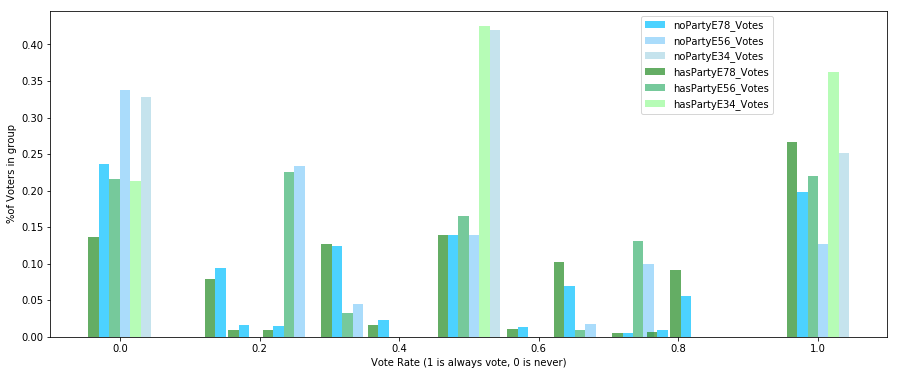

In [44]:
fig, ax = plt.subplots()

for idx, d in enumerate(dfm):
    w = 0.015
    shs = (-2,0,2) if idx==0 else (-3,-1,1)
    cs = ('deepskyblue','lightskyblue','lightblue') if idx==0 else ('forestgreen','mediumseagreen','palegreen')
    for idx, dd in enumerate([d[[c]].dropna() for c in d.columns[::-1]]):
        sh = shs[idx]*w
        ax.bar(dd.index+sh, dd.iloc[:,0], w, alpha=0.7, align='edge', label=dd.columns[0],
              color=cs[idx])

#plt.legend(loc='best')
plt.legend(bbox_to_anchor=(0.7,1))
plt.ylabel('%of Voters in group')
plt.xlabel('Vote Rate (1 is always vote, 0 is never)')
plt.show()

In [45]:
nop = dfm[0].loc[[0,1],:]
wp = dfm[1].loc[[0,1],:]
pd.concat([nop, wp], axis=1)
wp.rename(columns={'hasPartyE34_Votes':'E34', 'hasPartyE56_Votes':'E56',
                   'hasPartyE78_Votes':'E78'}, inplace=True)
nop.rename(columns={'noPartyE34_Votes':'E34', 'noPartyE56_Votes':'E56',
                   'noPartyE78_Votes':'E78'}, inplace=True)
wp-nop

,E34,E56,E78
VoteRate,,,
0,-0.115017,-0.122380,-0.099690
1,0.110310,0.092013,0.068948


##### Conclusion: having a party affiliation increases your probability of voting ~ 10%

In [46]:
v.Party.value_counts()

DEM    6634
NPP    4173
REP    1952
AI      266
LIB      71
GRN      49
IND      46
PF       37
UNK      27
MIS      17
MP       11
NAT       5
RAP       3
REF       3
AME       2
ACP       2
AC        2
NCM       1
LBL       1
NMB       1
PPC       1
EGA       1
CNP       1
ANA       1
Name: Party, dtype: int64

## looking at some of the sns plot options

In [47]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

In [48]:
cols_vr = ['E34_nVotesPct', 'E56_nVotesPct', 'E78_nVotesPct']
df = v.loc[:,cols_vr]
# replacing '-1' indicating no data for vote with NaN
for c in df[cols_vr]:
    df[c].replace(-1, np.NaN, inplace=True)
df.head()

,E34_nVotesPct,E56_nVotesPct,E78_nVotesPct
0,1.0,1.000000,1.000000
1,1.0,0.666667,0.800000
2,1.0,0.750000,0.833333
3,0.0,0.000000,0.000000
4,NaN,NaN,NaN


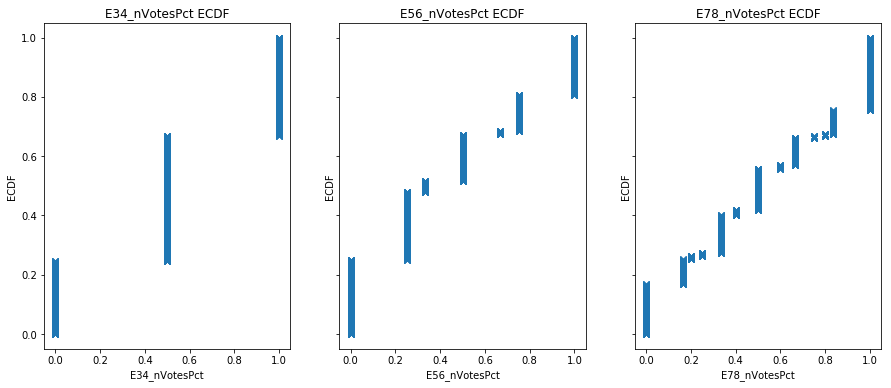

In [49]:
fig, axes = plt.subplots(1,3, sharey=True)
for idx, c in enumerate(df.columns):
    x_v, y_v = ecdf(df.iloc[:,idx].dropna())
    _ = axes[idx].plot(x_v, y_v, 'x')
    _ = axes[idx].set_title(c + ' ECDF')
    _ = axes[idx].set_xlabel(c)
    _ = axes[idx].set_ylabel('ECDF')
plt.show()

In [50]:
df1 = df.stack().reset_index()
df1 = df1.rename(columns={'level_0':'voter',
                   'level_1':'cycle',
                   0:'vr'})
df1.vr.value_counts(dropna=False)


1.000000    8057
0.500000    7246
0.000000    6877
0.250000    2423
0.333333    1931
0.750000    1290
0.666667    1265
0.166667    1042
0.833333     994
0.400000     226
0.200000     144
0.600000     141
0.800000      88
Name: vr, dtype: int64

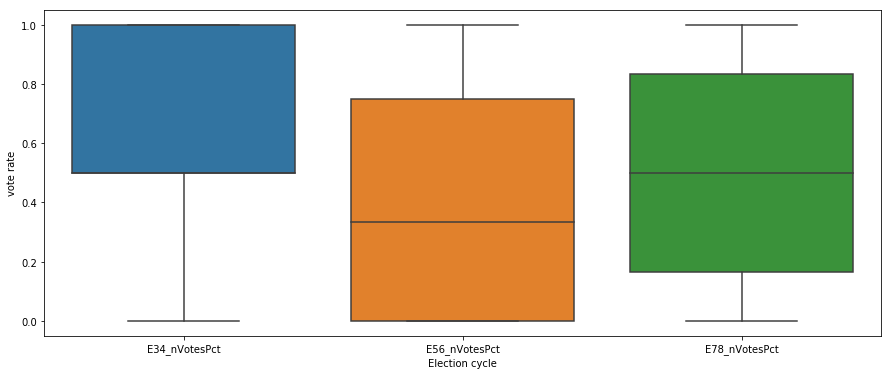

In [51]:
_ = sns.boxplot(x='cycle', y='vr', data = df1)
_ = plt.xlabel('Election cycle')
_ = plt.ylabel('vote rate')
plt.show()

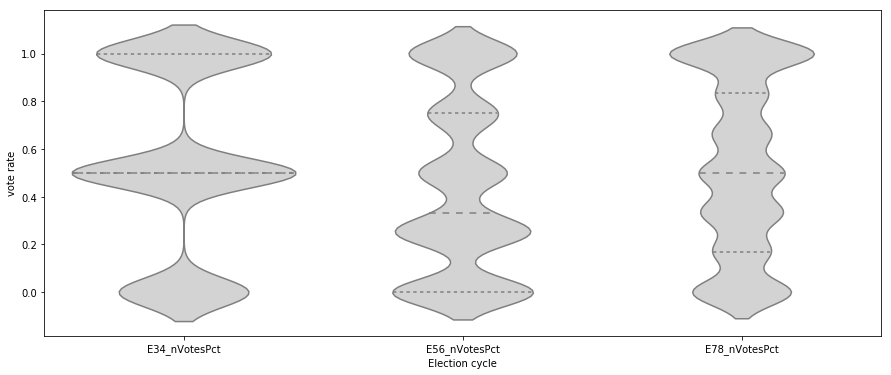

In [52]:
_ = sns.violinplot(x='cycle', y='vr', data=df1, inner='quartile', color='lightgray')
_ = plt.xlabel('Election cycle')
_ = plt.ylabel('vote rate')
plt.show()

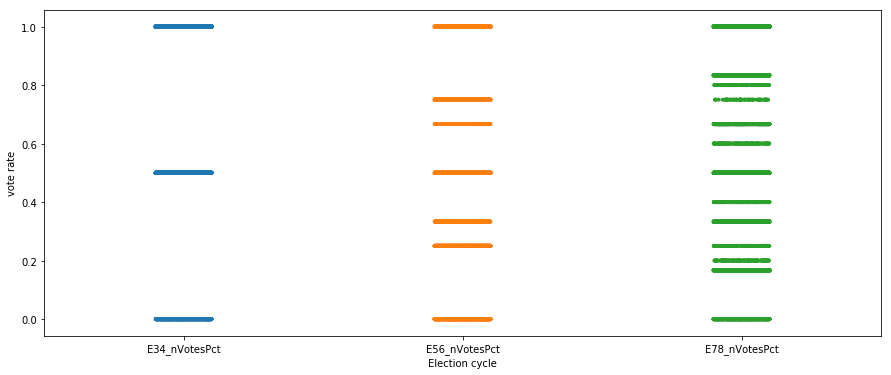

In [53]:
_ = sns.stripplot(x='cycle', y='vr', data=df1, size=4, jitter=True)
_ = plt.xlabel('Election cycle')
_ = plt.ylabel('vote rate')
plt.show()

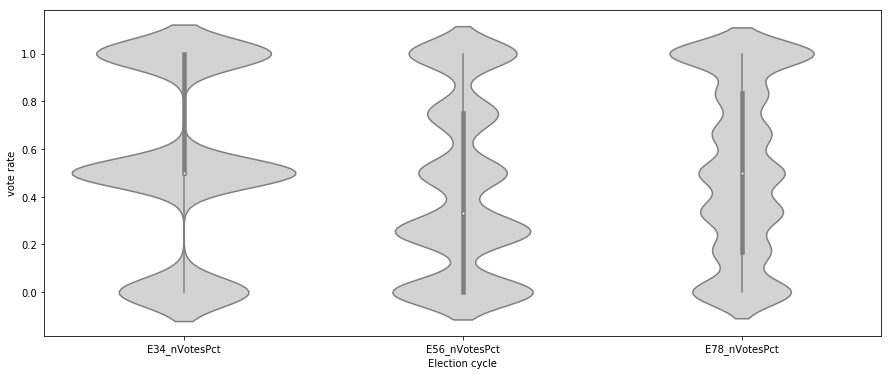

In [54]:
#_ = sns.boxplot(x='cycle', y='vr', data = df1)
_ = sns.violinplot(x='cycle', y='vr', data=df1, inner='box', color='lightgray')
#_ = sns.stripplot(x='cycle', y='vr', data=df1, size=4, jitter=True)
_ = plt.xlabel('Election cycle')
_ = plt.ylabel('vote rate')
plt.show()

In [55]:
#DOESNT RUN
#_ = sns.swarmplot(x='cycle', y='vr', data=df1)
#_ = plt.xlabel('Election cycle')
#_ = plt.ylabel('vote rate')
#plt.show()

## Trying Has Party

In [56]:
fields = ['HasParty']
df = v.loc[:,cols_vr + fields]

for f in fields:
    # converting cleaned not known data ie 'UNK' to NaNs
    if 'UNK' in df.loc[:,f].value_counts().index.values.astype(str):
        df.loc[:,f].replace('UNK', np.NaN, inplace=True)

# replacing '-1' indicating no data for vote with NaN
for c in df.columns:
    df[c].replace(-1, np.NaN, inplace=True)
df.head()

,E34_nVotesPct,E56_nVotesPct,E78_nVotesPct,HasParty
0,1.0,1.000000,1.000000,1
1,1.0,0.666667,0.800000,1
2,1.0,0.750000,0.833333,1
3,0.0,0.000000,0.000000,0
4,NaN,NaN,NaN,1


In [57]:
dfm = pd.DataFrame()
pre = ['noParty', 'hasParty']
for key, grp in df.groupby(['HasParty']):
    grp = grp.rename(columns={'E34_nVotesPct': pre[key]+'_E34_Votes', 
                        'E56_nVotesPct': pre[key]+'_E56_Votes',
                        'E78_nVotesPct': pre[key]+'_E78_Votes'})
    grp = grp.drop(['HasParty'], axis='columns')
    df1 = grp.loc[:,:].stack().reset_index()
    df1 = df1.rename(columns={'level_0':'voter',
                   'level_1':'cycle',
                   0:'vr'})
    print(df1.vr.value_counts(dropna=False))
    if dfm.empty:
        print('here')
        dfm = df1
    else:
        print('there')
        dfm = dfm.append(df1)
    print(dfm.head())
    print(dfm.info())

0.000000    2734
0.500000    2027
1.000000    1776
0.250000     735
0.333333     602
0.166667     359
0.666667     315
0.750000     311
0.833333     211
0.400000      85
0.200000      62
0.600000      52
0.800000      33
Name: vr, dtype: int64
here
   voter              cycle    vr
0      3  noParty_E34_Votes  0.00
1      3  noParty_E56_Votes  0.00
2      3  noParty_E78_Votes  0.00
3      7  noParty_E34_Votes  0.50
4      7  noParty_E56_Votes  0.75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9302 entries, 0 to 9301
Data columns (total 3 columns):
voter    9302 non-null int64
cycle    9302 non-null object
vr       9302 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 218.1+ KB
None
1.000000    6281
0.500000    5219
0.000000    4143
0.250000    1688
0.333333    1329
0.750000     979
0.666667     950
0.833333     783
0.166667     683
0.400000     141
0.600000      89
0.200000      82
0.800000      55
Name: vr, dtype: int64
there
   voter              cycle    v

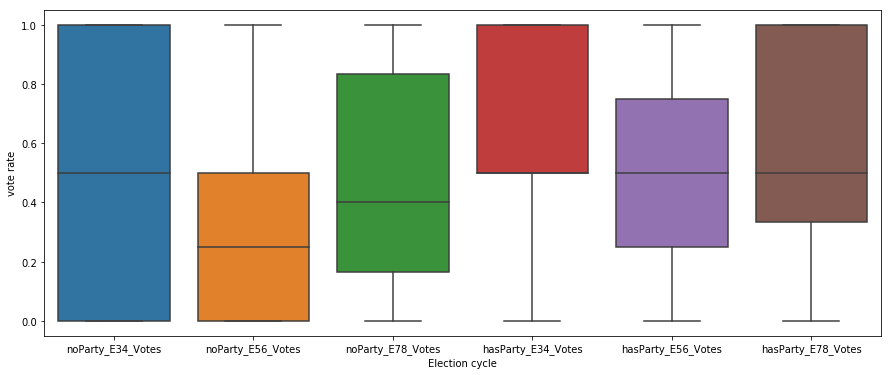

In [58]:
_ = sns.boxplot(x='cycle', y='vr', data = dfm)
_ = plt.xlabel('Election cycle')
_ = plt.ylabel('vote rate')
plt.show()

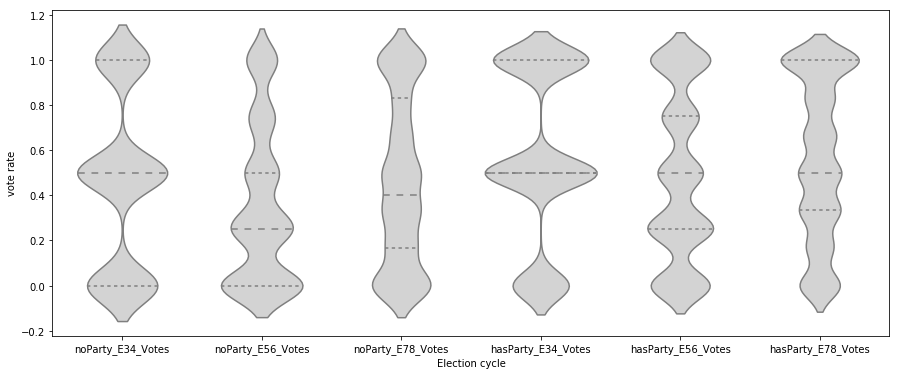

In [59]:
_ = sns.violinplot(x='cycle', y='vr', data=dfm, inner='quartile', color='lightgray')
_ = plt.xlabel('Election cycle')
_ = plt.ylabel('vote rate')
plt.show()

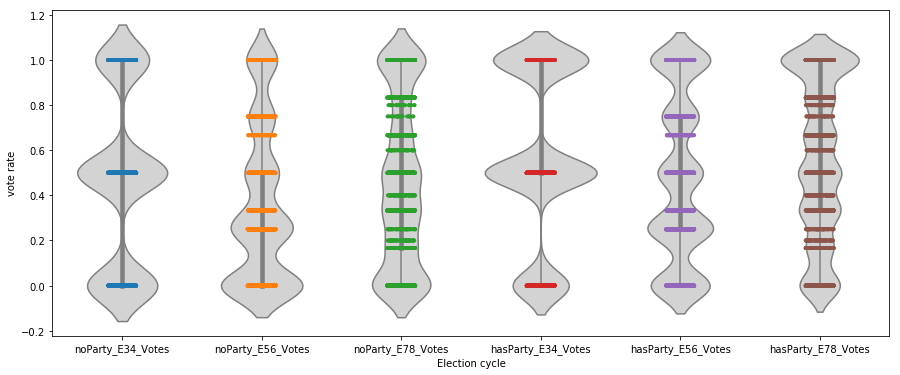

In [60]:
_ = sns.violinplot(x='cycle', y='vr', data=dfm, inner='box', color='lightgray')
_ = sns.stripplot(x='cycle', y='vr', data=dfm, size=4, jitter=True)
_ = plt.xlabel('Election cycle')
_ = plt.ylabel('vote rate')
plt.show()

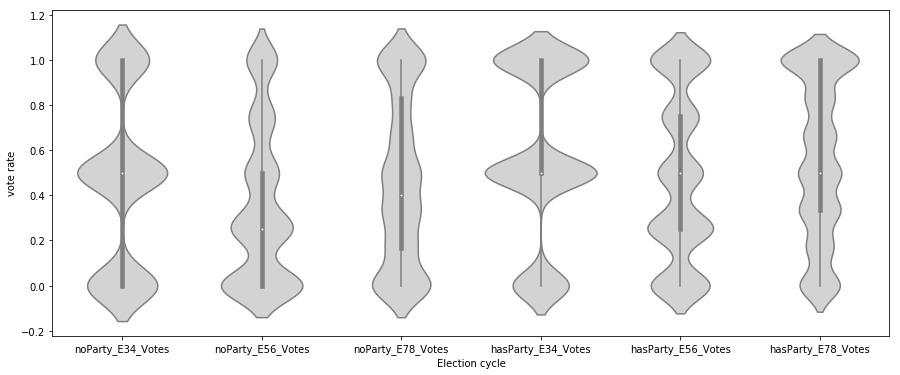

In [61]:
_ = sns.violinplot(x='cycle', y='vr', data=dfm, inner='box', color='lightgray')
_ = plt.xlabel('Election cycle')
_ = plt.ylabel('vote rate')
plt.show()

In [62]:
dfw = dfm.pivot_table(index='voter', columns='cycle', values='vr', aggfunc='sum')
dfw.head(5)

cycle,hasParty_E34_Votes,hasParty_E56_Votes,hasParty_E78_Votes,noParty_E34_Votes,noParty_E56_Votes,noParty_E78_Votes
voter,,,,,,
0,1.0,1.000000,1.000000,NaN,NaN,NaN
1,1.0,0.666667,0.800000,NaN,NaN,NaN
2,1.0,0.750000,0.833333,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.0,0.0
6,1.0,1.000000,1.000000,NaN,NaN,NaN


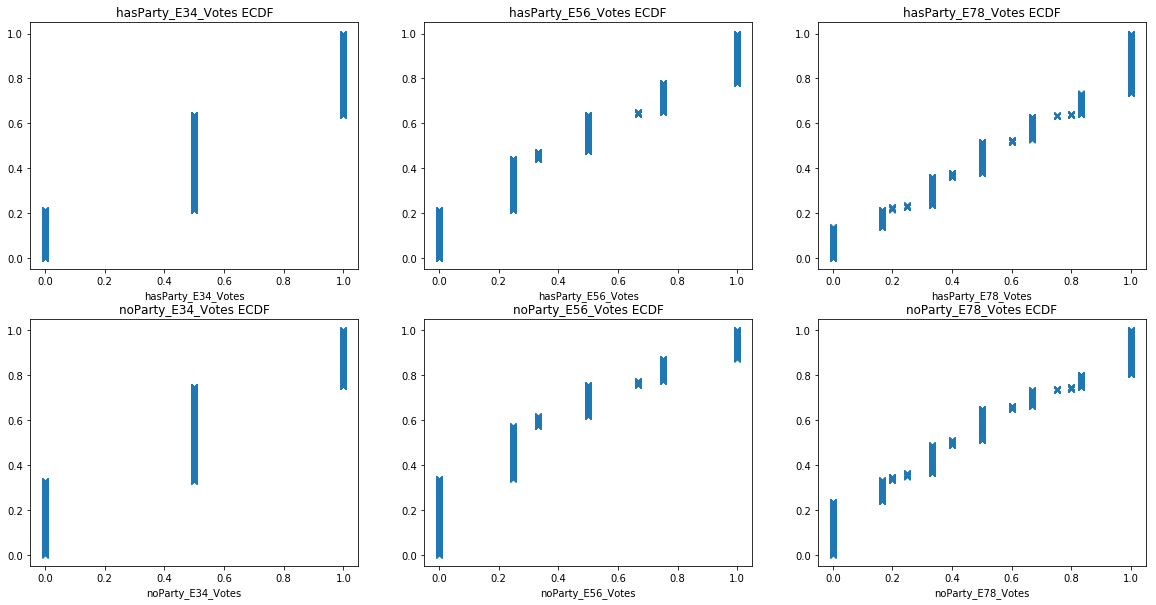

In [63]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axes = plt.subplots(2,3, sharey=False)
order = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
for idx, c in enumerate(dfw.columns):
    x_v, y_v = ecdf(dfw.iloc[:,idx].dropna())
    _ = axes[order[idx]].plot(x_v, y_v, 'x')
    _ = axes[order[idx]].set_title(c + ' ECDF')
    _ = axes[order[idx]].set_xlabel(c)
plt.show()

In [64]:
x_v, y_v = ecdf(dfw.iloc[:,1].dropna())

In [65]:
type(x_v)

numpy.ndarray

In [66]:
t = pd.DataFrame(x_v, columns=['rv'])
t.rv.value_counts()

0.250000    1614
1.000000    1567
0.000000    1539
0.500000    1176
0.750000     937
0.333333     237
0.666667      70
Name: rv, dtype: int64

In [67]:
def ecdf_size_no_vote_low(data):
    """Compute ECDF for a one-dimensional array of measurements. With counts as s."""
    # Calculating counts for each value in data
    t = pd.DataFrame(data)
    t = t.groupby(t.columns[0]).size()
    
    # Number of data points: n
    n = len(data)
    # size-data for the ECDF: s
    s = t.values
    # x-data for the ECDF: x
    x = np.round(t.index.values,2)
    # y-data for the ECDF: y
    y = np.array([a+b for a,b in zip(np.insert(np.cumsum(s),0,0),s/2)]) / n
    return x, y, s

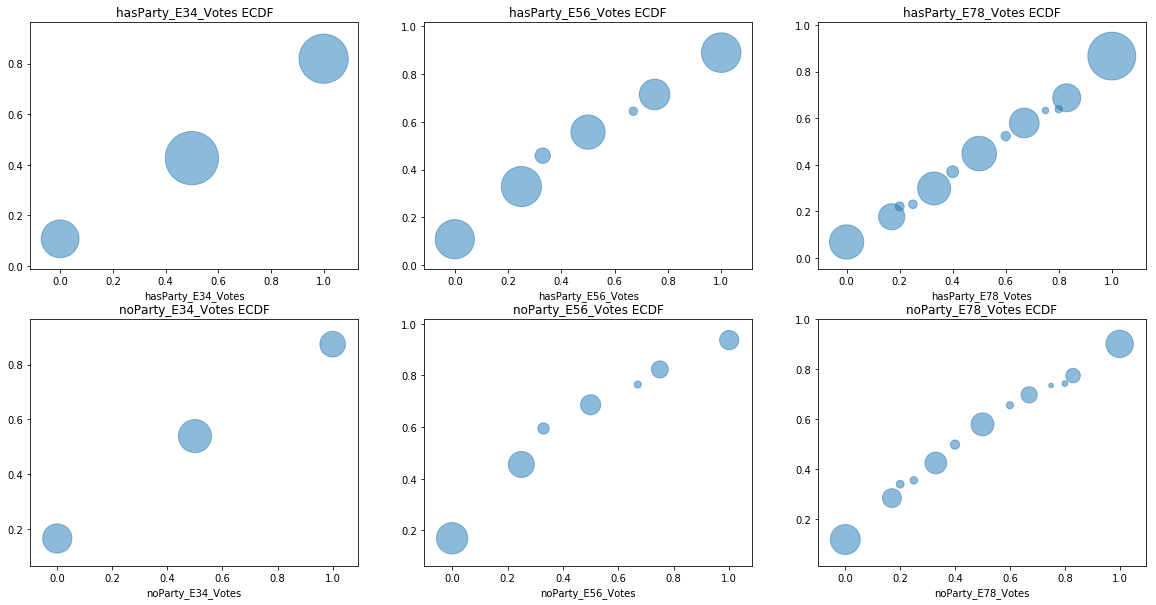

In [68]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axes = plt.subplots(2,3, sharey=False)
order = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
for idx, c in enumerate(dfw.columns):
    x_v, y_v, s_v = ecdf_size_no_vote_low(dfw.iloc[:,idx].dropna())
    _ = axes[order[idx]].scatter(x_v, y_v, s=s_v, alpha=0.5, label=c)
    _ = axes[order[idx]].set_title(c +' ECDF')
    _ = axes[order[idx]].set_xlabel(c)
plt.show()

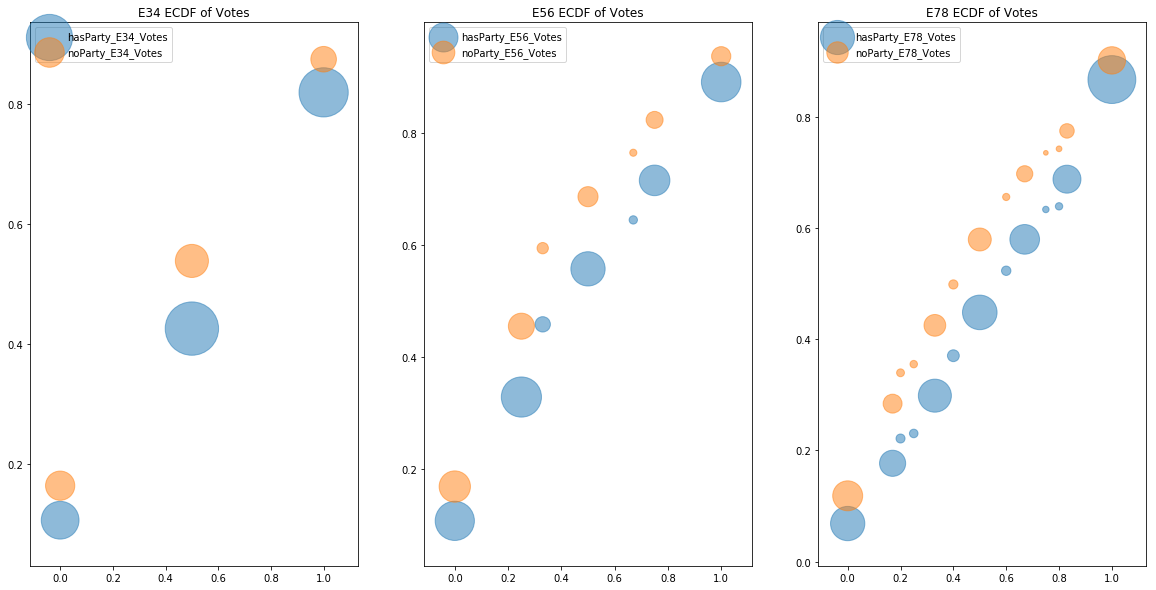

In [69]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axes = plt.subplots(1,3, sharey=False)
order = [0,1,2,0,1,2]
for idx, c in enumerate(dfw.columns):
    x_v, y_v, s_v = ecdf_size_no_vote_low(dfw.iloc[:,idx].dropna())
    _ = axes[order[idx]].scatter(x_v, y_v, s=s_v, alpha=0.5, label=c)
_ = axes[0].set_title('E34 ECDF of Votes')
_ = axes[1].set_title('E56 ECDF of Votes')
_ = axes[2].set_title('E78 ECDF of Votes')
_ = axes[0].legend(loc='upper left')
_ = axes[1].legend(loc='upper left')
_ = axes[2].legend(loc='upper left')
plt.show()

In [70]:
def ecdf_size_vote_low(data):
    """Compute ECDF for a one-dimensional array of measurements. With counts as s."""
    # Calculating counts for each value in data
    t = pd.DataFrame(data)
    t = t.groupby(t.columns[0]).size()
    
    # Number of data points: n
    n = len(data)
    # size-data for the ECDF: s
    s = t.values
    # x-data for the ECDF: x
    x = np.round(t.index.values,2)
    # y-data for the ECDF: y
    cs = np.insert(np.cumsum(s[::-1]),0,0)
    cs = cs[0:-1]
    y = np.array([a+b for a,b in zip(cs[::-1],s/2)]) / n
    return x, y, s

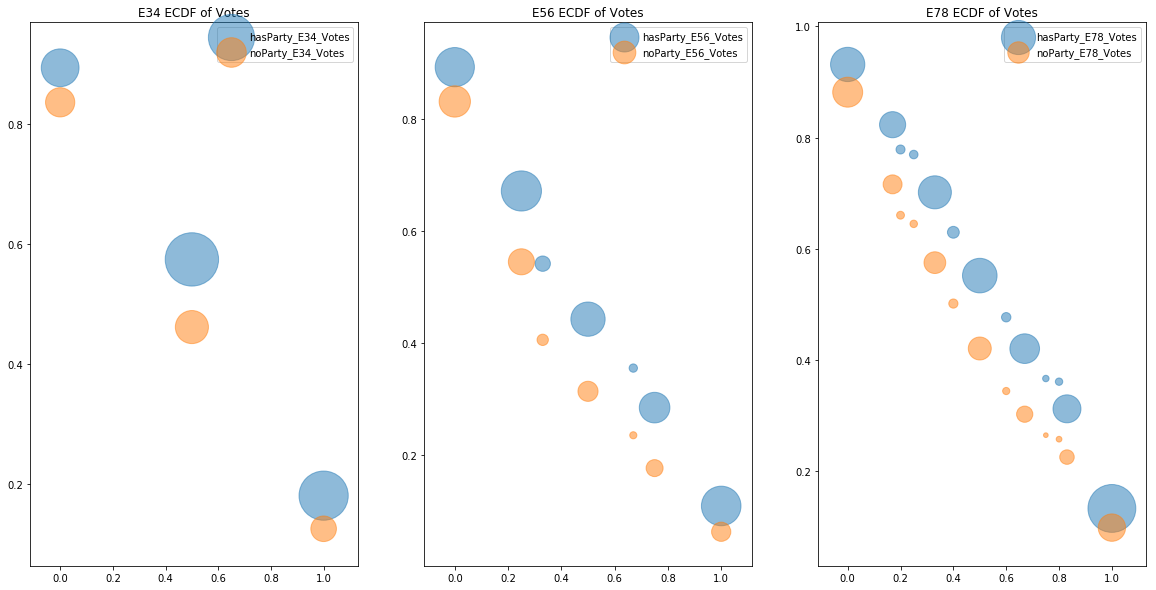

In [71]:
plt.rcParams["figure.figsize"] = (20,10)
fig, axes = plt.subplots(1,3, sharey=False)
order = [0,1,2,0,1,2]
for idx, c in enumerate(dfw.columns):
    x_v, y_v, s_v = ecdf_size_vote_low(dfw.iloc[:,idx].dropna())
    _ = axes[order[idx]].scatter(x_v, y_v, s=s_v, alpha=0.5, label=c)
_ = axes[0].set_title('E34 ECDF of Votes')
_ = axes[1].set_title('E56 ECDF of Votes')
_ = axes[2].set_title('E78 ECDF of Votes')
_ = axes[0].legend(loc='upper right')
_ = axes[1].legend(loc='upper right')
_ = axes[2].legend(loc='upper right')
plt.show()

# simplifying what I'm looking at to just the over all summary VR for any one voter

In [72]:
fields = ['HasParty']
df = v.loc[:,cols_vr + fields]

for f in fields:
    # converting cleaned not known data ie 'UNK' to NaNs
    if 'UNK' in df.loc[:,f].value_counts().index.values.astype(str):
        df.loc[:,f].replace('UNK', np.NaN, inplace=True)

# replacing '-1' indicating no data for vote with NaN
for c in df.columns:
    df[c].replace(-1, np.NaN, inplace=True)
df.head()

,E34_nVotesPct,E56_nVotesPct,E78_nVotesPct,HasParty
0,1.0,1.000000,1.000000,1
1,1.0,0.666667,0.800000,1
2,1.0,0.750000,0.833333,1
3,0.0,0.000000,0.000000,0
4,NaN,NaN,NaN,1


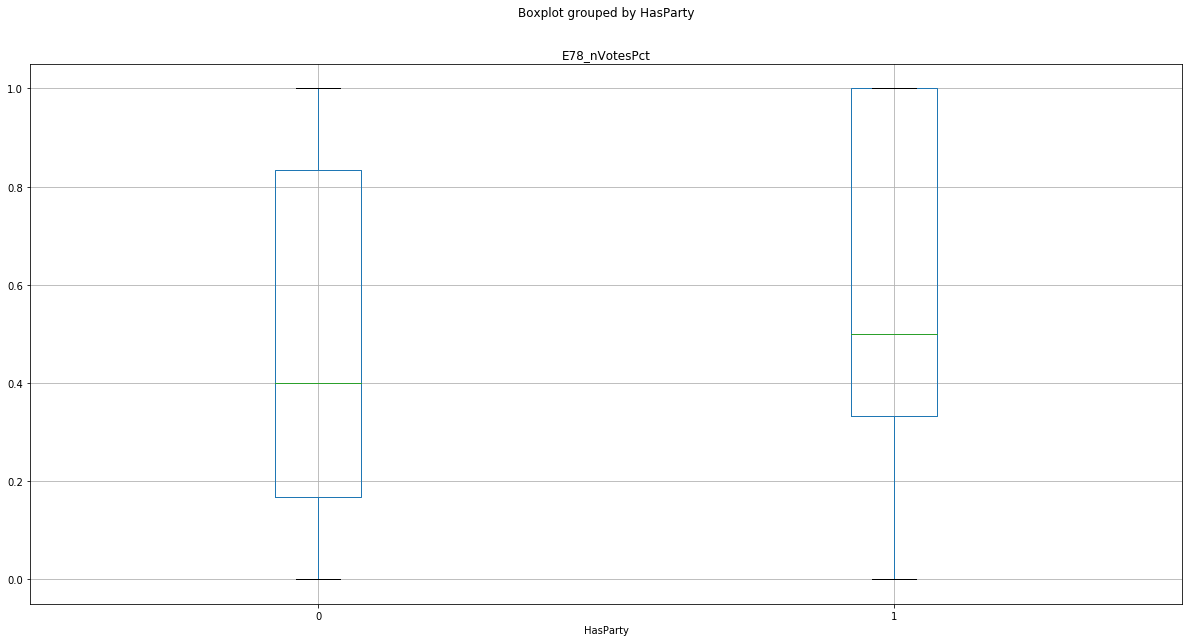

In [82]:
t = df[['E78_nVotesPct','HasParty']]
thp = df.loc[df.HasParty == 1,['E78_nVotesPct']].dropna()
tnp = df.loc[df.HasParty == 0,['E78_nVotesPct']].dropna()
t.boxplot(column='E78_nVotesPct', by='HasParty')
plt.show()

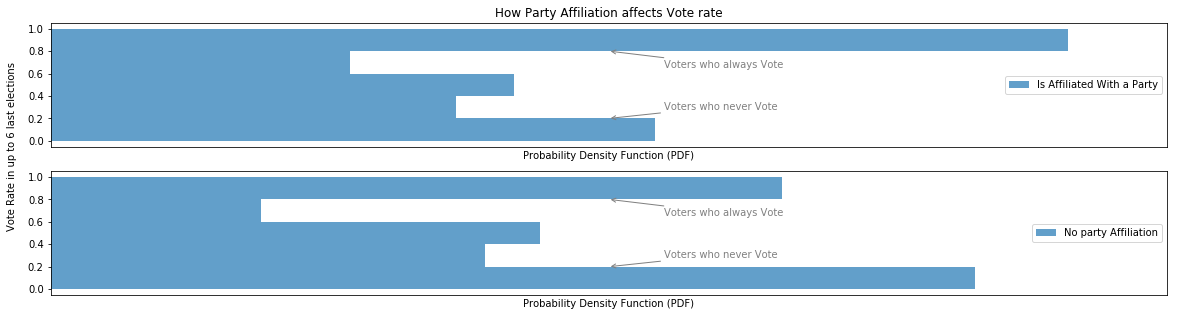

In [155]:
plt.rcParams["figure.figsize"] = (20,5)
ymin, ymax = 0.0, 2
fig, axes = plt.subplots(2,1, sharey=True)

n1, b1, _ = axes[0].hist(thp['E78_nVotesPct'], density=True, bins=5, orientation='horizontal',
                 label='Is Affiliated With a Party', alpha=0.7)
n2, b2, _ = axes[1].hist(tnp['E78_nVotesPct'], density=True, bins=5, orientation='horizontal',
                label='No party Affiliation', alpha=0.7)
ap = {'arrowstyle':'->', 'color':'gray'}
for ax in axes:
    ax.set_xlim([ymin, ymax])
    ax.set_xticks([])
    ax.set_xlabel('Probability Density Function (PDF)')
    ax.legend(loc='center right')
    ax.annotate('Voters who always Vote', xy=[1,0.8], xytext=[1.1,0.65], arrowprops=ap, color='gray')
    ax.annotate('Voters who never Vote', xy=[1,0.2], xytext=[1.1,0.28], arrowprops=ap, color='gray')
_ = axes[0].set_title('How Party Affiliation affects Vote rate')
_ = axes[0].set_ylabel('Vote Rate in up to 6 last elections')
_ = axes[0].yaxis.set_label_coords(-0.03, 0.0)
plt.show()

In [80]:
thp.E78_nVotesPct.value_counts(dropna=False)

 1.000000    2291
 0.500000    1196
 0.000000    1176
 0.333333    1092
 0.666667     880
 0.833333     783
 0.166667     683
NaN           523
 0.400000     141
 0.600000      89
 0.200000      82
 0.250000      74
 0.800000      55
 0.750000      42
Name: E78_nVotesPct, dtype: int64

## Check the vote calculations

In [27]:
cols = ['E6_110816', 'E5_060716', 'E4_110414', 'E3_060314', 'E2_110612', 'E1_060512',
        'E34_nVotesPos', 'E34_nVotes','E34_nVotesPct',
        'E56_nVotesPos', 'E56_nVotes', 'E56_nVotesPct',
        'E78_nVotesPos', 'E78_nVotes', 'E78_nVotesPct',
        'Eap_nVotesPos','Eap_nVotes', 'Eap_nVotesPct', 
        'Eag_nVotesPos', 'Eag_nVotes','Eag_nVotesPct', 
        'E2_GndTth', 'E4_GndTth', 'E6_GndTth',]
dfck = v.loc[:,cols]
dfck.rename(columns={'E6_110816':'E6', 'E5_060716':'E5', 'E4_110414':'E4', 
                     'E3_060314':'E3', 'E2_110612':'E2', 'E1_060512':'E1',
        'E34_nVotesPos':'34nVP', 'E34_nVotes':'34nV','E34_nVotesPct':'E34r',
        'E56_nVotesPos':'56nVP', 'E56_nVotes':'56nV', 'E56_nVotesPct':'E56r',
        'E78_nVotesPos':'78nVP', 'E78_nVotes':'78nV', 'E78_nVotesPct':'E78r',
        'Eap_nVotesPos':'apnVP','Eap_nVotes':'apnV', 'Eap_nVotesPct':'Eapr', 
        'Eag_nVotesPos':'agnVP', 'Eag_nVotes':'agnV','Eag_nVotesPct':'Eagr', 
        'E2_GndTth':'E2gt', 'E4_GndTth':'E4gt', 'E6_GndTth':'E6gt',}, inplace=True)
#dfck.loc[dfck.E6.isin(['A','V']),['E2','E4','E6','E2gt','E4gt','E6gt']].head(15)
#dfck.loc[:,['E1','E2','34nVP','34nV','E34r','E1','E2','E3','E4','56nVP','56nV','E56r']].head(15)
#dfck.loc[:,['E1','E2','E3','E4','E5','E6','78nVP','78nV','E78r']].head(15)
dfck.loc[:,['E1','E3','E5','apnVP','apnV','Eapr','E2','E4','E6','agnVP','agnV','Eagr']].head(15)

,E1,E3,E5,apnVP,apnV,Eapr,E2,E4,E6,agnVP,agnV,Eagr
0,V,V,A,3,3,1.000000,V,V,A,3,3,1.000000
1,,N,A,2,1,0.500000,V,V,A,3,3,1.000000
2,A,N,A,3,2,0.666667,V,A,A,3,3,1.000000
3,N,N,,2,0,0.000000,N,N,N,3,0,0.000000
4,,,,0,0,-1.000000,,,,0,0,-1.000000
5,,,,0,0,-1.000000,,,,0,0,-1.000000
6,V,A,V,3,3,1.000000,A,V,A,3,3,1.000000
7,N,A,A,3,2,0.666667,A,A,A,3,3,1.000000
8,,N,N,2,0,0.000000,,N,V,2,1,0.500000
9,N,N,N,3,0,0.000000,N,A,N,3,1,0.333333


In [ ]:
dfck[['E6','E5','E4','E3','E2','E1','E2gt','E4gt','E6gt']].head()